# Análisis de sonidos humanos

In [1]:
from pathlib import Path # Manejo de rutas del sistema operativo 
import os

# Math
import numpy as np
from scipy.io import wavfile # Manipulacion de archivos .wav
import librosa # Análisis de música y audio, para el procesamiento de audio

# Visualizacion
import matplotlib.pyplot as plt
import IPython.display as ipd # Usado para objetos de audio y visualizacion de controles de audio
import librosa.display #Paquete python para análisis de música y audio.
import warnings
warnings.filterwarnings("ignore") #Para filtrar advertencias específicas

%matplotlib inline

In [2]:
train_audio_path = 'input/recognition/train/audio/' 
#Ruta de la carpeta donde se encuentran los audios para el entrenamiento

16000
16000


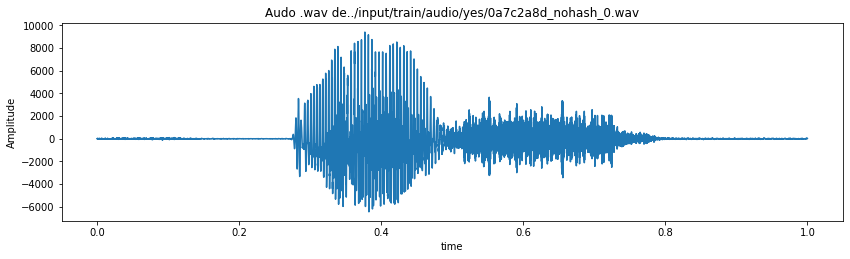

In [3]:
filename = 'yes/0a7c2a8d_nohash_0.wav' #Filename de un audio en especifico

#Permite la lectura de audio de una ruta definida
# 2 salidas: 
 # - Frecuencia de muestreo del archivo WAV
 # - Los datos, son array 1-D para WAV de 1 canal, o 2-D (Nsamples, Nchannels) 
sample_rate, samples = wavfile.read(train_audio_path + filename)

#Agregue un Eje a la figura como parte de una disposición de subtrama.
#Tres enteros (nrows, ncols, index
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)

#Indice comienza en 1 en la esquina superior izquierda y aumenta a la derecha.
ax1.set_title('Audo .wav de' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
# Agregacion etiqueta del eje X con un array 1-D con muestra de 0, hasta el numero de segmentaciones del audio
# Eje y, valores maximos de frecuencia por cada segmentacion.
print(sample_rate)
print(len(samples))

In [4]:
samples

array([ 14,  -7, -14, ...,  19,  20,  27], dtype=int16)

In [5]:
#Escucha del audio desde una ruta de archivo
ipd.Audio(str(train_audio_path) + filename)

In [6]:
ipd.Audio(samples, rate = sample_rate)

In [7]:
samples = np.array(samples, dtype='float64')
#Remuestrear una serie temporal de audio 'samples', de sample_rate a 8000
# - tasa de muestreo original de samples
# - tasa de muestreo objetivo
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000) # Escuchando la matriz de audio, con su tasa de muestreo original

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', '_background_noise_']


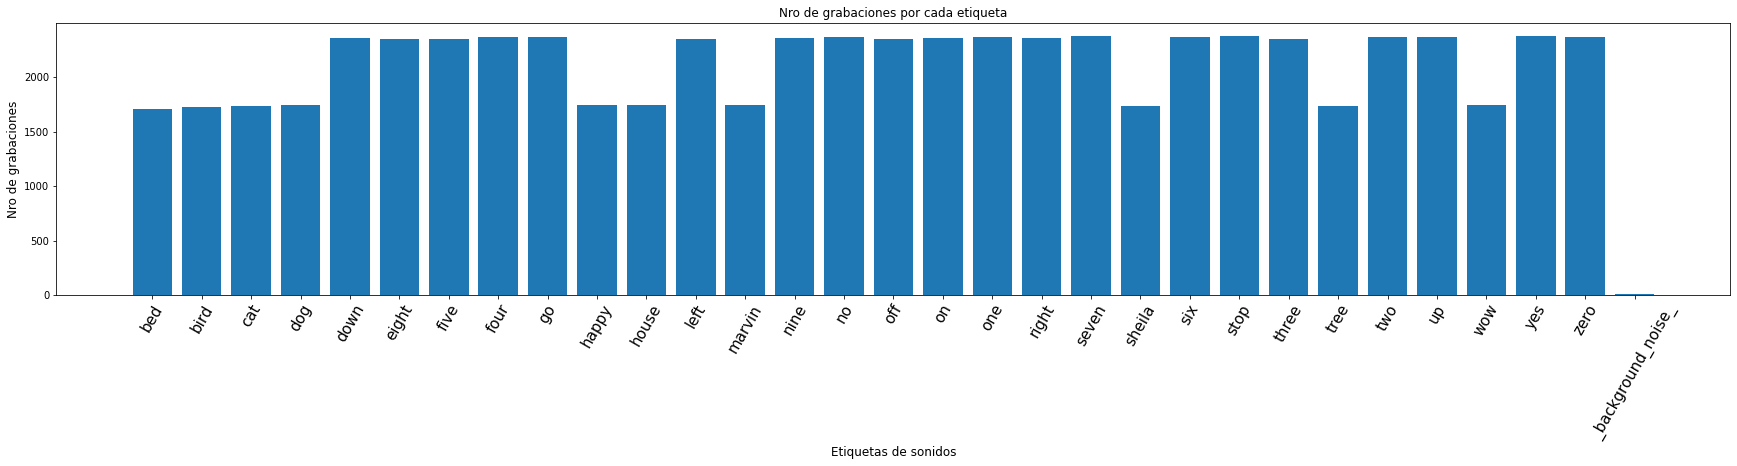

In [8]:

labels = os.listdir(train_audio_path) #Este método devuelve una lista que contiene los nombres de las entradas en el directorio dado por la ruta de acceso.
print(labels)

# Encontrar el recuento de cada etiqueta 
no_of_recordings=[] #Nro de grabaciones por etiqueta
for label in labels:
    #Comprueba y guarda en una lista los nombres, sí los nombres de archivos termina en .wav
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')] 
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Etiquetas de sonidos', fontsize=12)
plt.ylabel('Nro de grabaciones', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('Nro de grabaciones por cada etiqueta')
plt.show()

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"] #Etiquetas a enfocarnos

In [9]:
labels

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

In [10]:
all_wave = [] #Guarda las matrices remuestreadas de cada audio
all_label = [] #Guarda las etiquetas correspondientes al audio tocado
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        # Cargue un archivo de audio como una serie temporal de punto flotante.
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        #El audio se volverá a muestrear automáticamente a la velocidad dada
        # - ruta de acceso al archivo de entrada.
        # - tasa de muestreo objetivo
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [11]:
all_wave

[array([-0.00288872, -0.00409192, -0.00325268, ..., -0.00071929,
        -0.00112521, -0.00130131], dtype=float32),
 array([0.00040333, 0.00062642, 0.00036715, ..., 0.00081178, 0.0004867 ,
        0.00071138], dtype=float32),
 array([-0.00015848, -0.00017953, -0.00011552, ...,  0.00043101,
         0.00033173,  0.00030703], dtype=float32),
 array([0.00046723, 0.00055238, 0.00050303, ..., 0.00107649, 0.00087625,
        0.00080422], dtype=float32),
 array([0.00450181, 0.00737078, 0.00699746, ..., 0.0091497 , 0.0051514 ,
        0.00763448], dtype=float32),
 array([ 1.0794801e-04, -4.0887175e-05, -1.5581105e-05, ...,
         2.1516318e-03,  2.1671904e-03,  3.6258399e-03], dtype=float32),
 array([-5.8790420e-06, -1.2317709e-04,  4.2808983e-06, ...,
         6.1580606e-05,  8.4902633e-05, -2.2495997e-05], dtype=float32),
 array([-0.00077904, -0.00120447, -0.00076867, ..., -0.00264565,
        -0.00237624, -0.00218475], dtype=float32),
 array([-1.6455460e-05,  4.2772699e-05,  6.9867143e-05

In [12]:
all_label

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',


In [13]:
#Codifiqua etiquetas de destino con valor entre 0 y n_classes-1.
#Se puede utilizar para transformar etiquetas no numéricas a etiquetas numéricas.
#LabelEncoder se puede utilizar para normalizar las etiquetas.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_label)

classes = list(le.classes_) #Lista de las clases unicas (etiquetas)

In [14]:
classes

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [15]:
y

array([9, 9, 9, ..., 1, 1, 1], dtype=int64)

----

----

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1,1)).toarray()

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
len(all_wave)

21312

In [19]:
all_wave = np.array(all_wave).reshape(-1,8000,1) #El -1 infiere 
all_wave

array([[[-2.88872398e-03],
        [-4.09192173e-03],
        [-3.25268088e-03],
        ...,
        [-7.19285978e-04],
        [-1.12521090e-03],
        [-1.30131142e-03]],

       [[ 4.03327926e-04],
        [ 6.26417692e-04],
        [ 3.67147470e-04],
        ...,
        [ 8.11780745e-04],
        [ 4.86697943e-04],
        [ 7.11379049e-04]],

       [[-1.58481183e-04],
        [-1.79531227e-04],
        [-1.15519455e-04],
        ...,
        [ 4.31013264e-04],
        [ 3.31727992e-04],
        [ 3.07029666e-04]],

       ...,

       [[-1.52462671e-04],
        [-2.13622799e-04],
        [-1.75312554e-04],
        ...,
        [ 4.78350848e-04],
        [ 3.12889199e-04],
        [ 2.94630474e-04]],

       [[-5.92960969e-05],
        [-1.66434096e-04],
        [-1.80037678e-04],
        ...,
        [ 1.01546226e-04],
        [-4.89999038e-05],
        [-1.18220858e-04]],

       [[ 1.62130367e-04],
        [ 4.54971945e-04],
        [ 3.75219883e-04],
        ...,
        

In [20]:
#Division de matrices aleatorios de train y test
#Stratify != None, los datos se dividen de forma estratificada, utilizando un array-like como etiquetas de clase.
#random_state : Controla el barajado aplicado a los datos antes de aplicar la división.
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(all_wave, y, stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [21]:
x_tr

array([[[ 1.54528007e-05],
        [-1.48469786e-04],
        [-2.41062458e-04],
        ...,
        [-2.04037235e-04],
        [-2.73207814e-04],
        [-8.45049726e-05]],

       [[-1.10685118e-02],
        [-1.63799021e-02],
        [-1.48279825e-02],
        ...,
        [-1.82744600e-02],
        [-1.42718097e-02],
        [-1.68036073e-02]],

       [[ 1.17884658e-03],
        [ 1.60573819e-03],
        [ 4.56617185e-04],
        ...,
        [-1.94252864e-03],
        [-1.24830112e-03],
        [-1.98647240e-03]],

       ...,

       [[-7.29831008e-05],
        [-2.01340808e-04],
        [-5.74979167e-05],
        ...,
        [-1.60013005e-04],
        [ 1.45266575e-04],
        [-1.34669783e-04]],

       [[-3.62342944e-05],
        [-1.04555067e-04],
        [-3.00363099e-05],
        ...,
        [ 2.47656517e-05],
        [-8.64977701e-05],
        [-6.93918992e-05]],

       [[ 1.03871334e-05],
        [-4.78364054e-05],
        [-7.26908911e-05],
        ...,
        

In [22]:
y_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Resumen
- Se visualiza un input(imagen 2d de entrada)
- Una convulacion con 3 filtros, cada filtro aplicado un ReLU
- Aplicando pooling, el volumen se obtiene pero la imagen reduce su tamaño
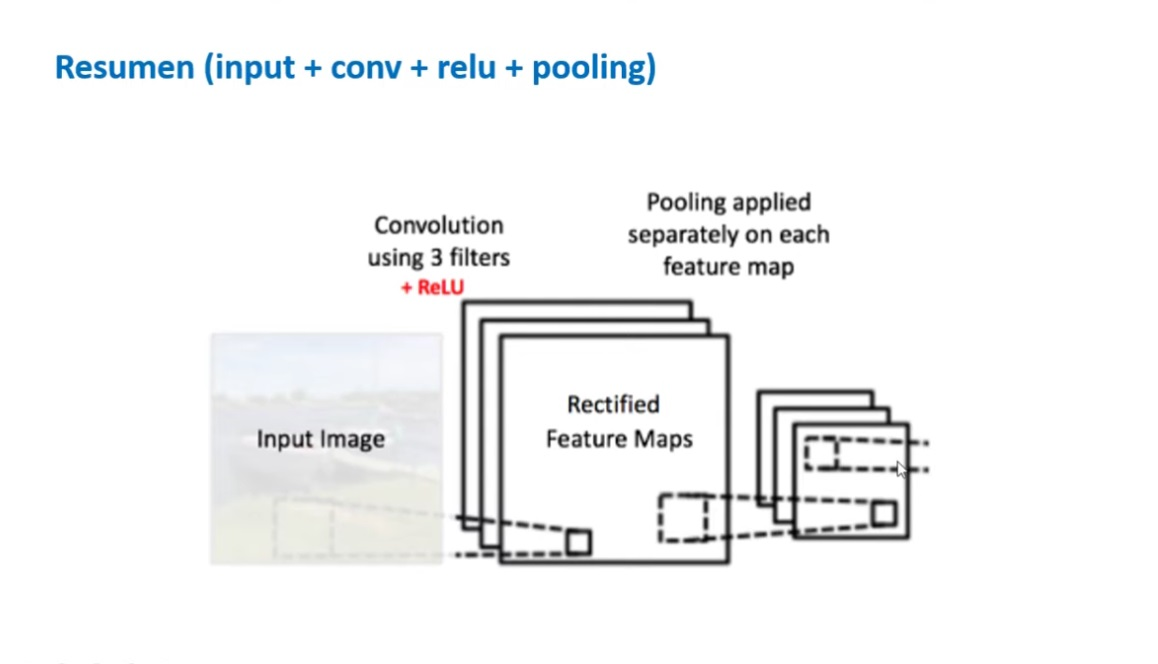

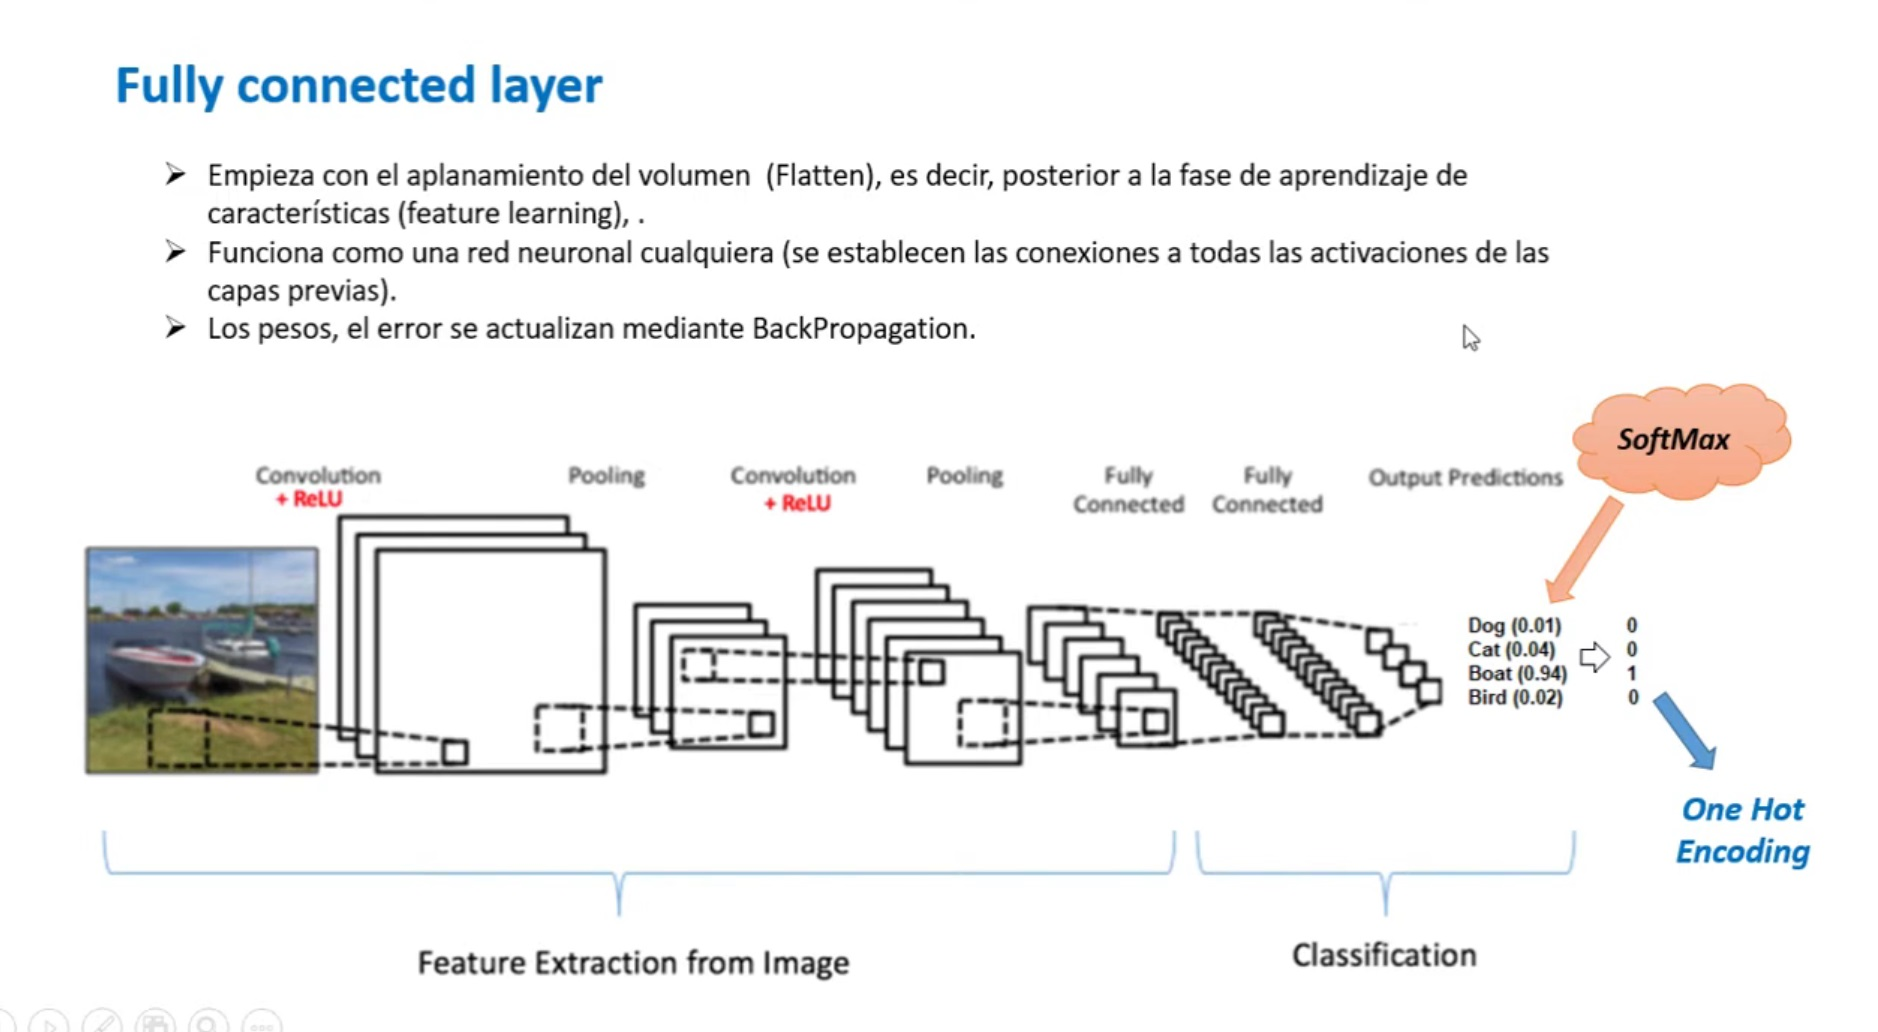

In [23]:
#keras.layers : Las capas son los bloques básicos de construcción de las redes neuronales en Keras
# - Conv1D : Recorre en el array por cuadros(filtros)
#            Genera un volumen de imagenes(aumenta la profundidad, segun la cantidad de filtros que se aplique)
# - Dropout : Apaga aleatoriamente ciertas neuronas en las capas, con el objetivo de prevenir el overfiting(sobre-aprendizaje)
# - Flatten : Aplanamos la matriz pooling
# - Dense :  Dense implementa la operación: dónde se pasa la función de activación en cuanto a elementos como argumento, es 
    # una matriz de ponderaciones creada por la capa y es un vector de sesgo creado por la capa (solo aplicable si es).
# - MaxPooling1D : Reduce la dimension segun el max valor

'''
   Existen 4 operaciones principales en las redes neuronales convolucionales:
   - input -> Conv -> ReLU -> Conv -> ReLU -> Pool -> ReLU -> Conv -> ReLU -> Pool -> FullyConnected
'''
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model #Para crear nuestro modelo de entrenamiento 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K #Si hay una sesion de keras, se reinicia desde cero
#Limpiamos en caso de un nuevo entrenamiento
K.clear_session()

#Entrada de 8000
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv) 
                        
#Second Conv1D layer
conv = Conv1D(16, 11, activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv) 
#Entero positivo, dimensionalidad del espacio de salida.
conv = Dropout(0.2)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.2)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs) #Se crea el modelo a partir de entradas y salidas
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [24]:
#Configura el modelo para el entrenamiento.
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
#Algoritmo de perdida 'categorical_crossentropy'
#Compilacion del modelo, optimizador 'sgd'
#Metricas de eficiencia

In [25]:
# La devolución de llamada EarlyStopping se configura cuando se crea una instancia a través de argumentos.
# 1. El "monitor" le permite especificar la medida de rendimiento para supervisar con el fin de finalizar el entrenamiento.
# -  'val_loss' para la pérdida en el conjunto de datos de validación.
# 2. el argumento"mode"deberá especificarse como si el objetivo de la métrica elegida es aumentar (maximizar o 'max') o disminuir (minimizar o 'min').
# 3. Para descubrir la época de entrenamiento en la que se detuvo el entrenamiento, el argumento"verbose"se puede establecer en 1. Una vez detenida, la devolución de llamada imprimirá el número de época.
# 4. Número de épocas en las que nos gustaría no ver ninguna mejora
# 5. Mejora en la medida de rendimiento  especificado
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 

# Devolución de llamada para guardar el modelo Keras o los pesos del modelo con cierta frecuencia.
# 1. Cadena o ruta de acceso para guardar el archivo de modelo
# 2. El nombre de la métrica que se debe supervisar.
# 3. Modo de verbosidad, 0 o 1
# 4. Sólo se guarda cuando el modelo se considera el "mejor" y el mejor modelo más reciente según la cantidad monitoreada 
# 5. La decisión de sobrescribir el archivo de guardado actual, en función de la maximización o la minimización de la cantidad supervisada. 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [26]:
# batch_size : Número de muestras por actualización de degradado
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - 82s 150ms/step - loss: 2.3023 - accuracy: 0.0967 - val_loss: 2.2980 - val_accuracy: 0.1276
Epoch 2/100
533/533 [==============================] - 86s 161ms/step - loss: 2.2964 - accuracy: 0.1199 - val_loss: 2.2924 - val_accuracy: 0.1335
Epoch 3/100
533/533 [==============================] - 106s 199ms/step - loss: 2.2876 - accuracy: 0.1338 - val_loss: 2.2806 - val_accuracy: 0.1433
Epoch 4/100
533/533 [==============================] - 103s 194ms/step - loss: 2.2760 - accuracy: 0.1430 - val_loss: 2.2648 - val_accuracy: 0.1544
Epoch 5/100
533/533 [==============================] - 114s 213ms/step - loss: 2.2588 - accuracy: 0.1481 - val_loss: 2.2289 - val_accuracy: 0.1715
Epoch 6/100
533/533 [==============================] - 117s 220ms/step - loss: 2.2184 - accuracy: 0.1658 - val_loss: 2.1727 - val_accuracy: 0.1992
Epoch 7/100
533/533 [==============================] - 113s 213ms/step - loss: 2.1723 - accuracy: 0.1882 - val_loss: 2.1

In [27]:
def predict(audio):
    # Genera predicciones de salida
    # Devuelve un array de preddiciones
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [28]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Texto:",predict(samples))

Audio: right
Texto: right
